In [1]:
# -*- coding: utf-8 -*-
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or
# implied.
# See the License for the specific language governing permissions and
# limitations under the License.
#

# Post pruning Decision trees

<div style="display:flex;gap:4rem;">
<div>

Post-pruning is a technique used to reduce the size of a decision tree after it has been built, aiming to reduce overfitting.

#### Helpful links

- [Post pruning decision trees with cost complexity pruning | Scikit](https://scikit-learn.org/0.22/auto_examples/tree/plot_cost_complexity_pruning.html)
- [Post pruning decision trees](https://medium.com/swlh/post-pruning-decision-trees-using-python-b5d4bcda8e23)

</div>
<div style="width:50%">

![post-pruning](https://scikit-learn.org/0.22/_images/sphx_glr_plot_cost_complexity_pruning_001.png)

</div>
</div>

In [2]:
import math

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# set default figure size for plots
plt.rcParams['figure.figsize'] = 15, 10

### Entropy

Entropy is used to measure the impurity or randomness in a set; it helps decide the best splits.
High entropy means more disorder; low entropy means more purity.
It is used in decision trees to select features that best separate the classes.

The formula for entropy is:
$$Entropy = - \sum_{i=1}^{c} p_i \log_2(p_i)$$

In [3]:
# entropy for distribution with 9/14 and 5/14
-(9 / 14) * math.log2(9 / 14) - (5 / 14) * math.log2(5 / 14)

0.9402859586706311

In [4]:
# entropy for distribution with 9/15 and 6/15
-(9 / 15) * math.log2(9 / 15) - (6 / 15) * math.log2(6 / 15)

0.9709505944546686

### Gini

Gini impurity measures the probability of incorrectly classifying a randomly chosen element.
Lower gini means better class separation; it is computationally efficient.
Used in decision trees to select splits that improve homogeneity (refers to how similar the data points are in relation to their class labels.) in child nodes.

Gini impurity is calculated as:
$$Gini = 1 - \sum_{i=1}^{c} p_i^2$$

In [5]:
# gini impurity for distribution with 9/14 and 5/14
1 - ((9 / 14) ** 2 + (5 / 14) ** 2)

0.4591836734693877

In [6]:
# gini impurity for distribution with 9/15 and 6/15
1 - ((9 / 15) ** 2 + (6 / 15) ** 2)

0.48

# 01 Iris dataset

In this section we demonstrate how a decision tree can classify flower species based on their features.

[Text(0.5, 0.9166666666666666, 'x[2] <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.4230769230769231, 0.75, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.46153846153846156, 0.8333333333333333, 'True  '),
 Text(0.5769230769230769, 0.75, 'x[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.5384615384615384, 0.8333333333333333, '  False'),
 Text(0.3076923076923077, 0.5833333333333334, 'x[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.15384615384615385, 0.4166666666666667, 'x[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(0.07692307692307693, 0.25, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(0.23076923076923078, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.46153846153846156, 0.4166666666666667, 'x[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.38461538461538464, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.5384615384615384, 0.25, 

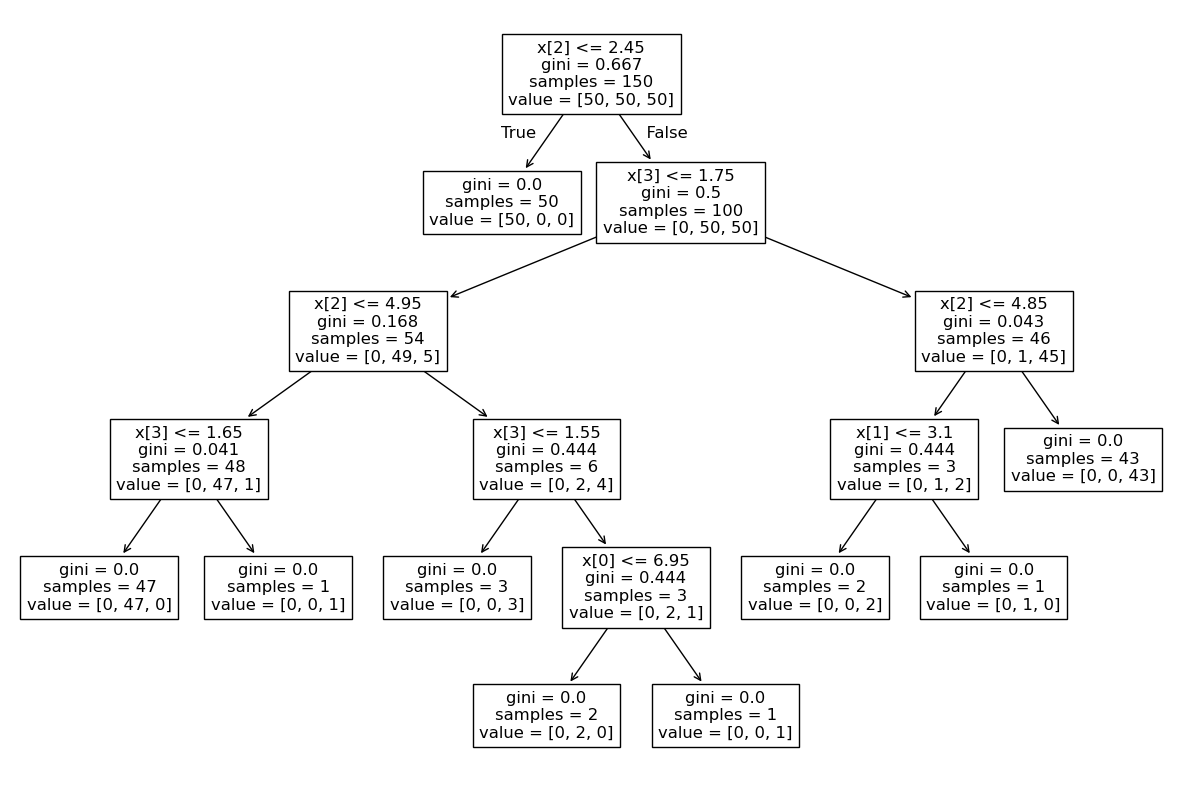

In [7]:
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target

# create and train a decision tree classifier on iris data
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)

# plot the decision tree to visualize how decisions are made
tree.plot_tree(clf)

#### Cross-validation

> Cross-validation is a statistical technique used to assess the performance of a machine learning model on unseen data.
It involves splitting the dataset into multiple subsets (folds) and training the model on some folds while validating it on the remaining ones.
This helps evaluate the model's ability to generalize to new data, reducing the risk of overfitting or underfitting.

In [8]:
from sklearn.model_selection import cross_val_score

# perform 10-fold cross-validation to evaluate model performance
cross_val_score(clf, iris.data, iris.target, cv=10)

array([1.        , 0.93333333, 1.        , 0.93333333, 0.93333333,
       0.86666667, 0.93333333, 1.        , 1.        , 1.        ])

# 02 Titanic dataset (load train dataset only)

Practical application in intelligent data analysis to handle real-world data.

> The goal: is to predict whether to predict survival.

In [9]:
data = pd.read_csv('titanic/train.csv')
X, y = data[['Pclass',
             'Sex',
             'Age',
             'SibSp',
             'Parch',
             'Fare',
             'Cabin',
             'Embarked']], data['Survived']

# fill missing values with 0
X, y = X.fillna(0), y.fillna(0)

# convert categorical variables to numeric using one-hot encoding
X = pd.get_dummies(X)

# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

## Overfitting example

Here we train a decision tree on the titanic data to see how overfitting can occur.
Overfitting results in high training accuracy but lower test accuracy.
It highlights the need for techniques like pruning in intelligent data analysis.

In [10]:
model = DecisionTreeClassifier(random_state=1).fit(X_train, y_train)
y_predicted = model.predict(X_test)

print('training accuracy: ', model.score(X_train, y_train))
print('test Accuracy: ', model.score(X_test, y_test))

training accuracy:  0.9903691813804173
test Accuracy:  0.7761194029850746


## Post-pruning
- The `DecisionTreeClassifier` class in sklearn provides **`ccp_alpha`** as a parameter for post pruning.
- The parameter `ccp_alpha` provides a threshold for effective alphas, i.e. the process of pruning continues until the minimum effective alpha of the pruned tree is not greater than `ccp_alpha`.
- The `DecisionTreeClassifier` class also provides a method **`cost_complexity_pruning_path`** which implements **the pruning process** and returns the effective alphas (and the corresponding impurities of there pruned trees)

{'ccp_alphas': array([0.00000000e+00, 0.00000000e+00, 1.42678794e-04, 1.60513644e-04,
       2.20706260e-04, 2.92491528e-04, 8.02568218e-04, 8.56072766e-04,
       9.87776269e-04, 9.87776269e-04, 1.07009096e-03, 1.07009096e-03,
       1.07796454e-03, 1.25770431e-03, 1.33761370e-03, 1.33761370e-03,
       1.36753400e-03, 1.37583123e-03, 1.37583123e-03, 1.45228841e-03,
       1.47137507e-03, 1.52870137e-03, 1.60513644e-03, 1.68961730e-03,
       1.84732774e-03, 1.91087671e-03, 1.96611572e-03, 2.06374685e-03,
       2.14018192e-03, 2.16271015e-03, 2.24719101e-03, 2.40770465e-03,
       2.46404657e-03, 2.49687890e-03, 2.66260382e-03, 2.88924559e-03,
       2.93970807e-03, 3.04975923e-03, 3.42180248e-03, 3.93188777e-03,
       6.01333133e-03, 6.19679542e-03, 8.64451052e-03, 1.22070626e-02,
       1.27995980e-02, 3.64216439e-02, 1.48693178e-01]), 'impurities': array([0.01139647, 0.01139647, 0.01168183, 0.01184234, 0.01228375,
       0.01257624, 0.01337881, 0.01594703, 0.01891036, 0.02483702,

Text(0.5, 1.0, 'total Impurity vs effective alpha for training set')

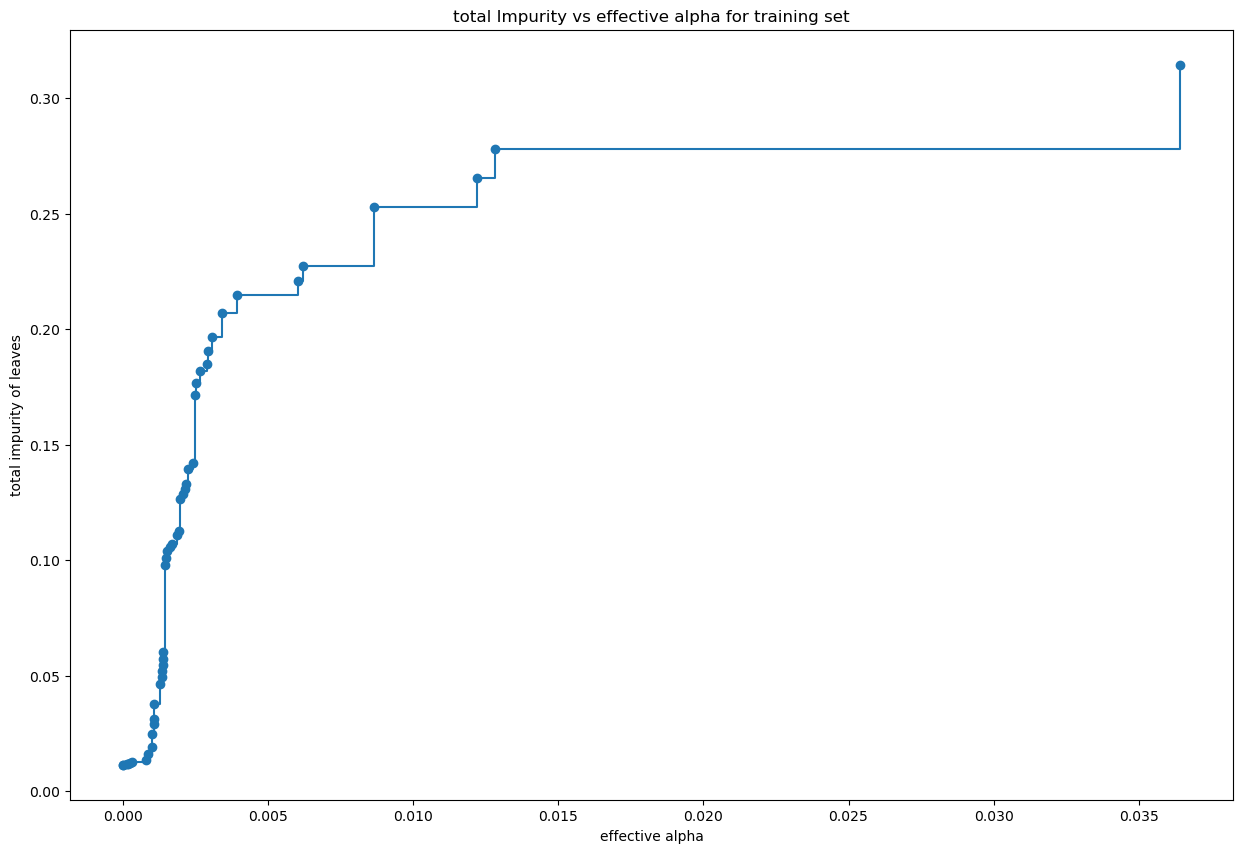

In [11]:
# compute cost complexity pruning path
path = DecisionTreeClassifier(random_state=1).cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
print(path)

# plot total impurity vs effective alpha for the training set
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1],
        impurities[:-1],
        marker='o',
        drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("total Impurity vs effective alpha for training set")

Next, we train multiple decision trees with different ccp_alpha values.
As the effective alpha increases, the tree is pruned more aggressively.
This shows how pruning controls overfitting by simplifying the tree.

In [12]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

print("number of nodes in the last tree is: {} with ccp_alpha: {} and a depth of: {}". \
      format(clfs[-1].tree_.node_count, ccp_alphas[-1], clfs[-1].tree_.max_depth))

number of nodes in the last tree is: 1 with ccp_alpha: 0.1486931782834916 and a depth of: 0


>! We remove the last element in **`clfs`** and **`ccp_alphas`**, because it is the trivial tree with only one node. Here we show that the number of nodes and tree depth decreases as alpha increases.

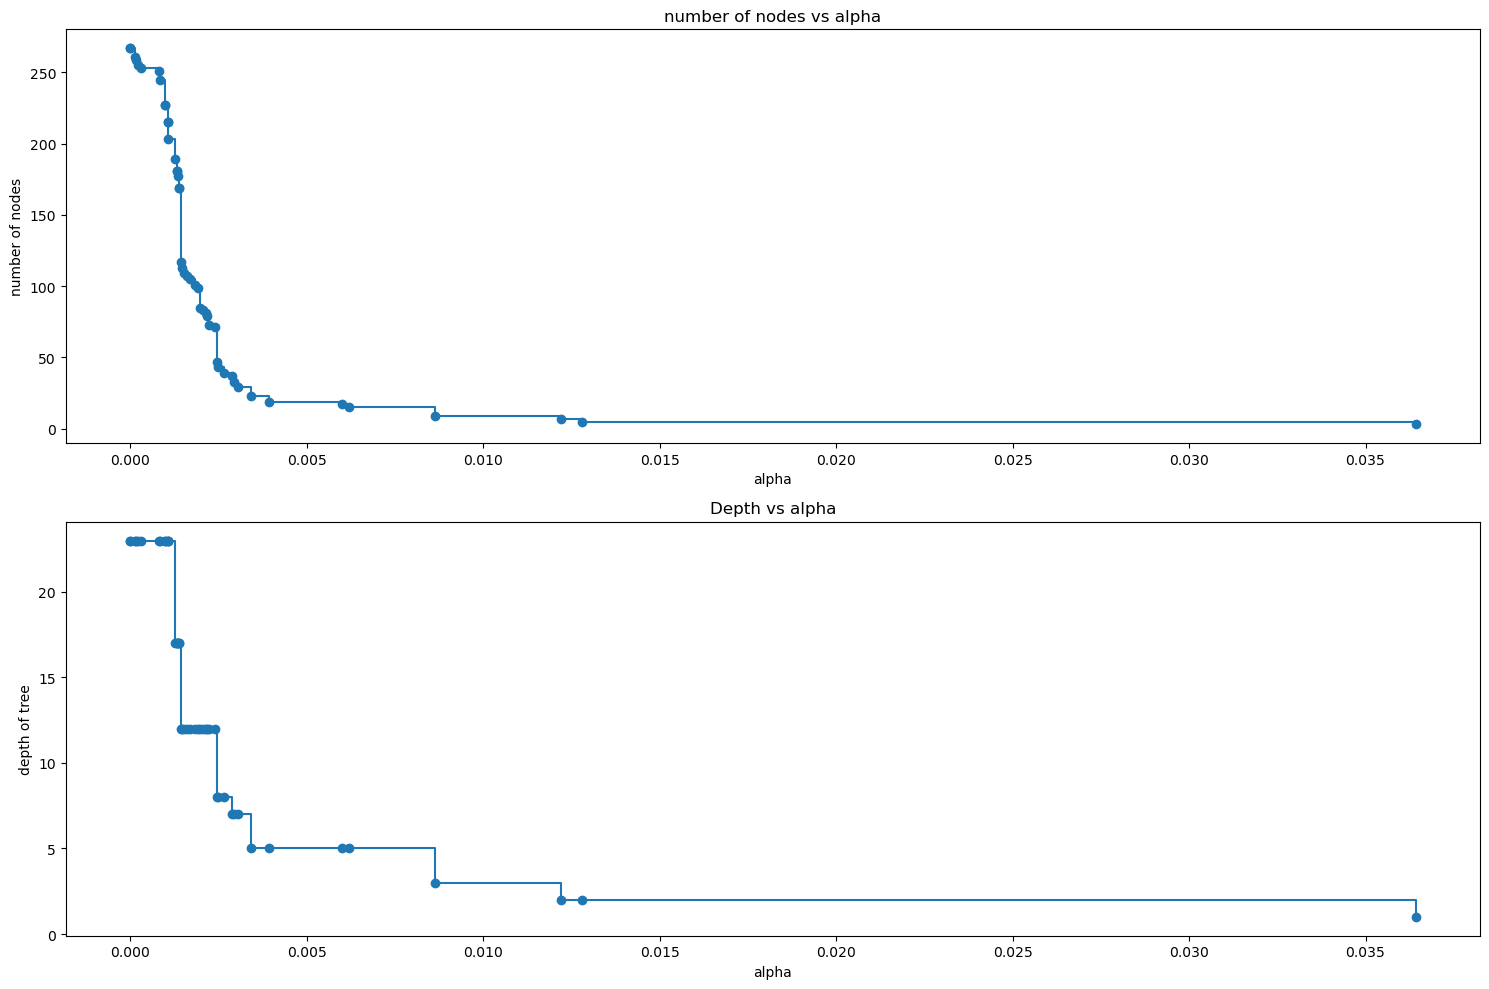

In [13]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]

# plot number of nodes and depth vs alpha
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas,
           node_counts,
           marker='o',
           drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("number of nodes vs alpha")

ax[1].plot(ccp_alphas,
           depth,
           marker='o',
           drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

## Accuracy vs alpha for training and testing sets

Plotting accuracy against alpha helps in finding the optimal pruning level.
Optimal pruning minimizes overfitting while maintaining prediction accuracy.

> The goal is to balance complexity and generalization for the best model performance.

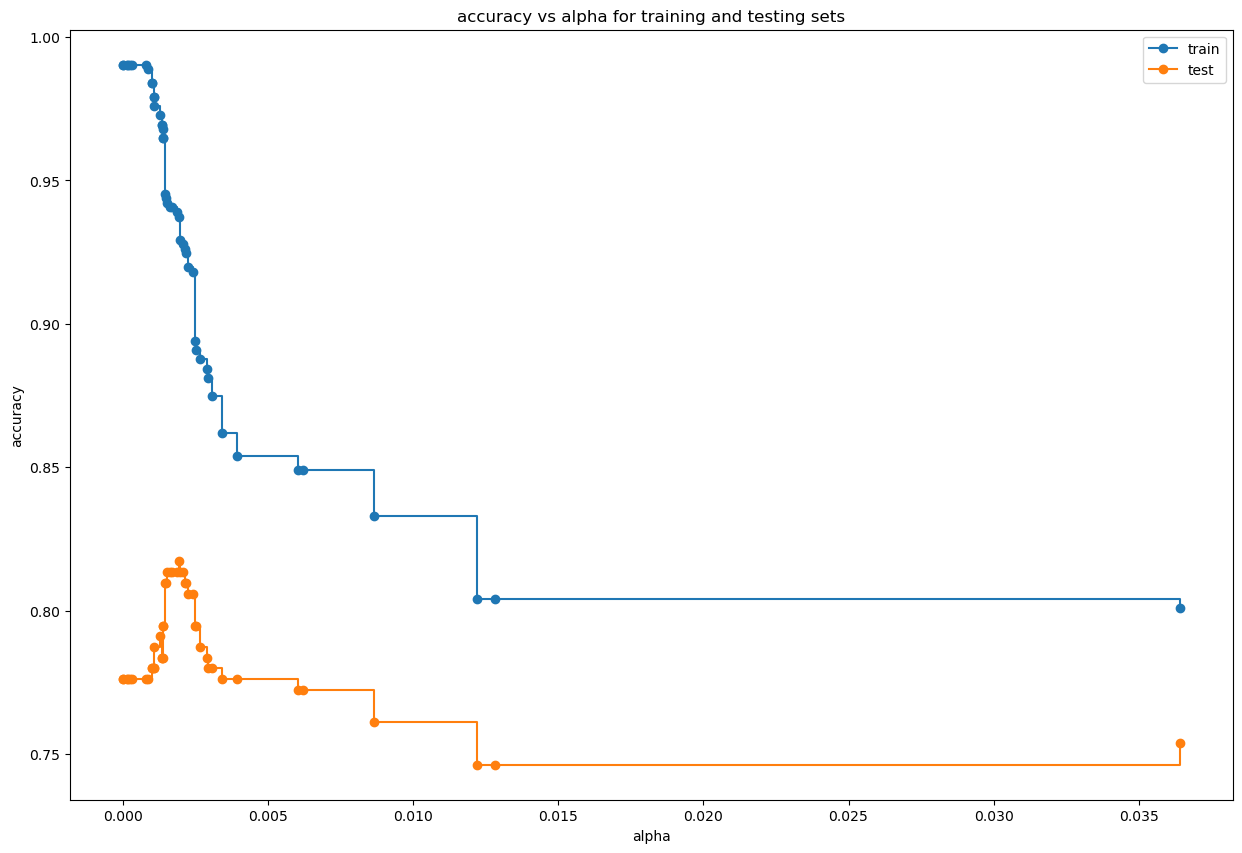

In [14]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

# plot accuracy for training and testing sets against alpha
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("accuracy vs alpha for training and testing sets")

ax.plot(ccp_alphas,
        train_scores,
        marker='o',
        label="train",
        drawstyle="steps-post")

ax.plot(ccp_alphas,
        test_scores,
        marker='o',
        label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

## Use the best model

Select the model with the highest test accuracy after pruning.
This model is expected to generalize well to unseen data.
Achieving the right balance of pruning is key in intelligent data analysis.

In [15]:
index_best_model = np.argmax(test_scores)
best_model = clfs[index_best_model]

print('training accuracy of best model: ', best_model.score(X_train, y_train))
print('test accuracy of best model: ', best_model.score(X_test, y_test))

training accuracy of best model:  0.9373996789727127
test accuracy of best model:  0.8171641791044776
